In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_size=100,out_size=1):
        super().__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size)
        self.linear = nn.Linear(hidden_size,out_size)
        self.hidden = (torch.zeros(1, 1, hidden_size), torch.zeros(1, 1, hidden_size))

    def forward(self,seq):
        lstm_out, self.hidden = self.lstm(seq.view(len(seq), 1, -1), self.hidden)
        pred= self.linear(lstm_out.view(len(seq), -1))

        return pred[-1]


torch.manual_seed(50)
model = LSTM()
# train_data.cuda()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)


print(model)


for p in model.parameters():
    print(p.numel())

LSTM(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)
400
40000
400
400
100
1


In [130]:
import random
lenth = 1000
x = []
y = []
train_data = []
for i in range(lenth):
    if i <500:
        x.append(i*1+random.uniform(0,2))
        y.append(i*i)
    if i>=500:
        x.append(i*1+random.uniform(0,2))
        y.append(i*i)
    
x = torch.Tensor(x)
y = torch.Tensor(y)
# print(x)

# 训练集数据归一化，并化为cuda类型
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(-1,1))

x = np.array(x)
x = sc.fit_transform(x.reshape(-1,1))
x = torch.FloatTensor(x).view(-1)

y = np.array(y)
y = sc.fit_transform(y.reshape(-1,1))
y = torch.FloatTensor(y).view(-1)

for i in range(lenth):
    train_data.append((x[i:i+1],y[i:i+1]))
    
print(train_data[0:10])

[(tensor([0.8198]), tensor([0.])), (tensor([1.5628]), tensor([1.])), (tensor([2.2203]), tensor([4.])), (tensor([3.3726]), tensor([9.])), (tensor([4.1393]), tensor([16.])), (tensor([5.4998]), tensor([25.])), (tensor([6.1831]), tensor([36.])), (tensor([7.6201]), tensor([49.])), (tensor([8.0827]), tensor([64.])), (tensor([9.4811]), tensor([81.]))]


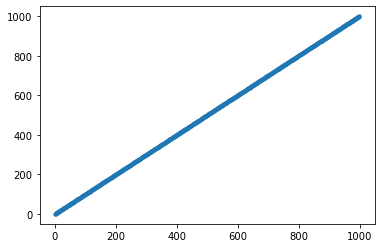

In [131]:
plt.plot(x,'.')
plt.show()

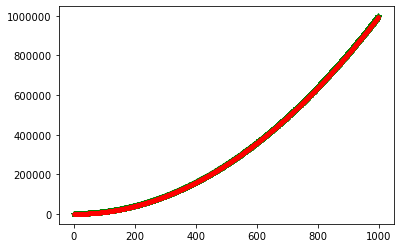

tensor(2864556.2500, grad_fn=<MseLossBackward>)


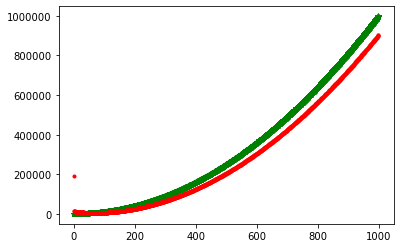

tensor(9.0154e+09, grad_fn=<MseLossBackward>)


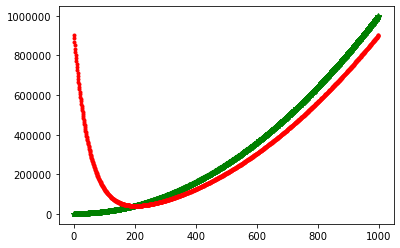

tensor(9.0154e+09, grad_fn=<MseLossBackward>)


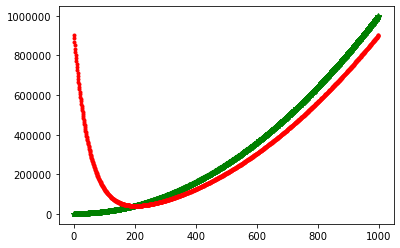

tensor(9.0154e+09, grad_fn=<MseLossBackward>)


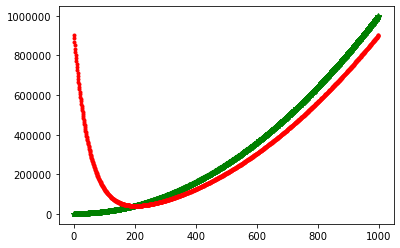

tensor(9.0154e+09, grad_fn=<MseLossBackward>)


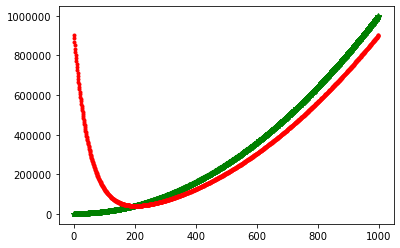

tensor(9.0154e+09, grad_fn=<MseLossBackward>)


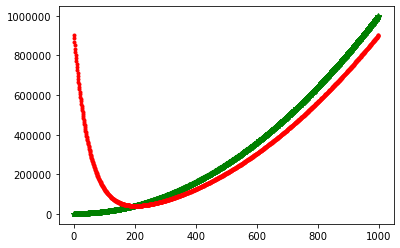

tensor(9.0154e+09, grad_fn=<MseLossBackward>)


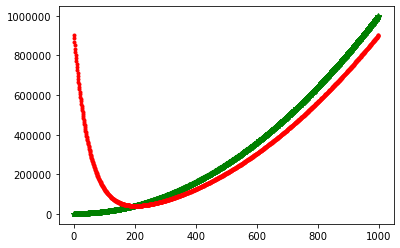

tensor(9.0154e+09, grad_fn=<MseLossBackward>)


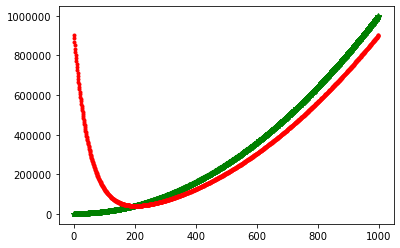

tensor(9.0154e+09, grad_fn=<MseLossBackward>)


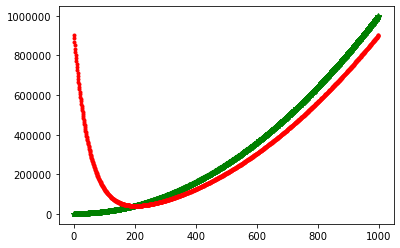

tensor(9.0154e+09, grad_fn=<MseLossBackward>)


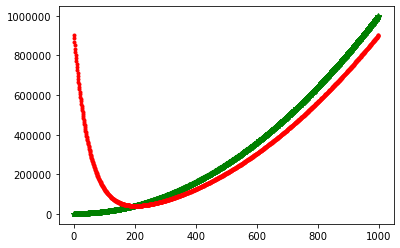

tensor(9.0154e+09, grad_fn=<MseLossBackward>)


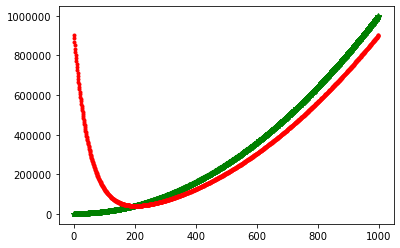

tensor(9.0154e+09, grad_fn=<MseLossBackward>)


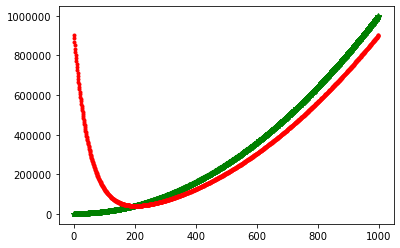

tensor(9.0154e+09, grad_fn=<MseLossBackward>)


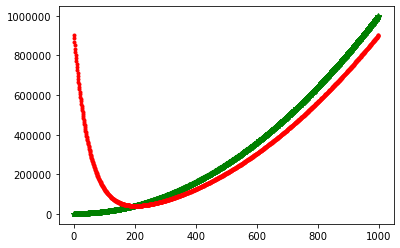

tensor(9.0154e+09, grad_fn=<MseLossBackward>)


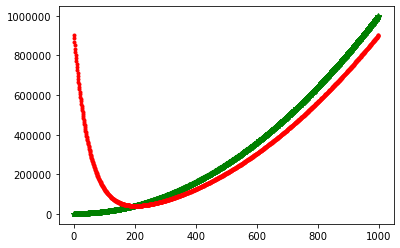

tensor(9.0154e+09, grad_fn=<MseLossBackward>)


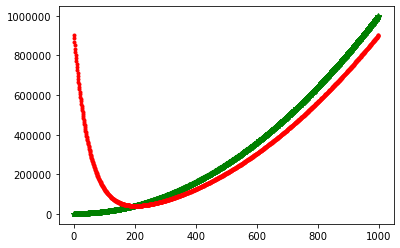

tensor(9.0154e+09, grad_fn=<MseLossBackward>)


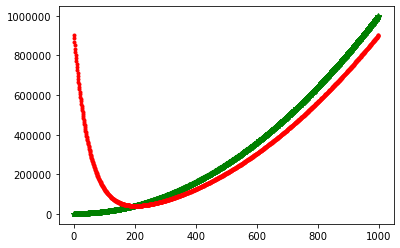

tensor(9.0154e+09, grad_fn=<MseLossBackward>)


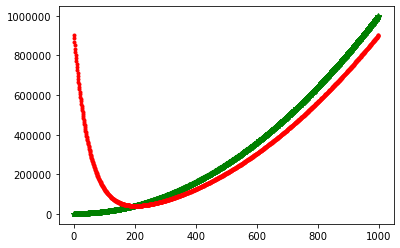

tensor(9.0154e+09, grad_fn=<MseLossBackward>)


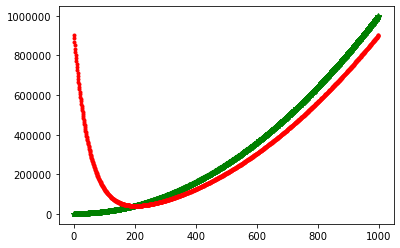

tensor(9.0154e+09, grad_fn=<MseLossBackward>)


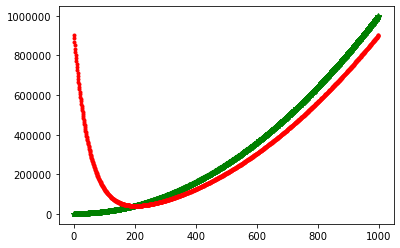

tensor(9.0154e+09, grad_fn=<MseLossBackward>)


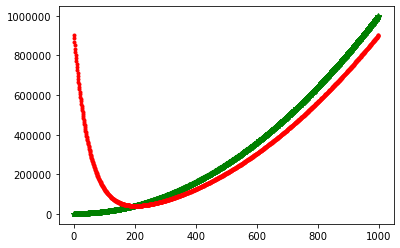

tensor(9.0154e+09, grad_fn=<MseLossBackward>)


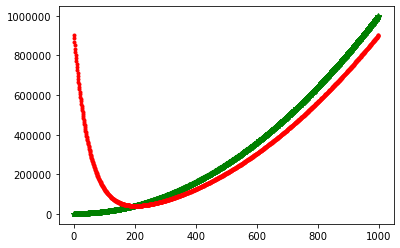

tensor(9.0154e+09, grad_fn=<MseLossBackward>)


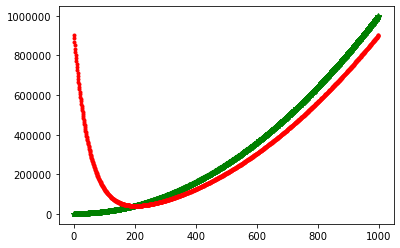

tensor(9.0154e+09, grad_fn=<MseLossBackward>)


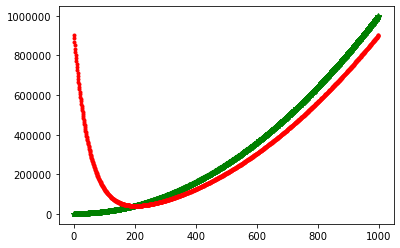

tensor(9.0154e+09, grad_fn=<MseLossBackward>)


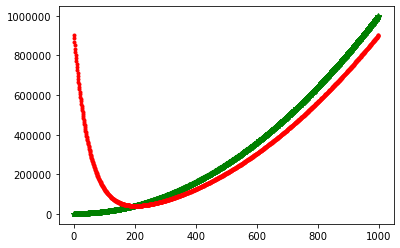

tensor(9.0154e+09, grad_fn=<MseLossBackward>)


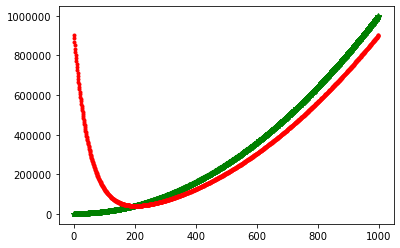

tensor(9.0154e+09, grad_fn=<MseLossBackward>)


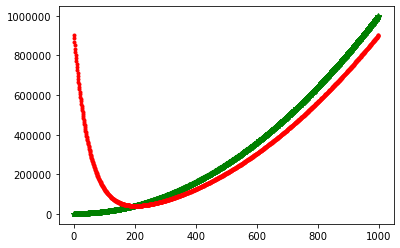

tensor(9.0154e+09, grad_fn=<MseLossBackward>)


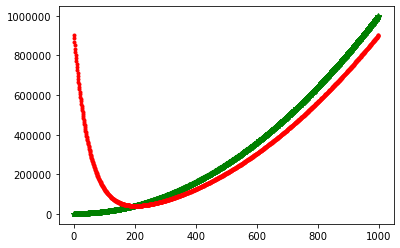

tensor(9.0154e+09, grad_fn=<MseLossBackward>)


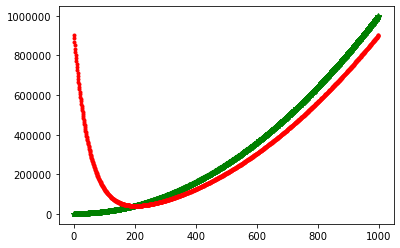

tensor(9.0154e+09, grad_fn=<MseLossBackward>)


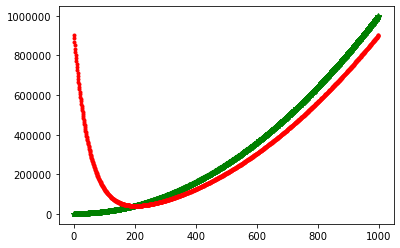

tensor(9.0154e+09, grad_fn=<MseLossBackward>)


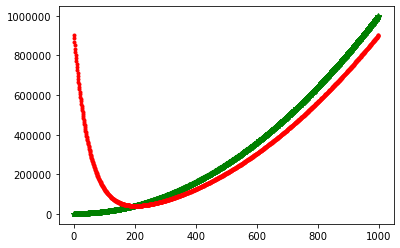

tensor(9.0154e+09, grad_fn=<MseLossBackward>)


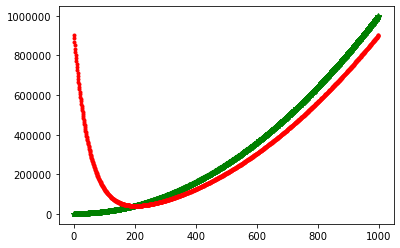

tensor(9.0154e+09, grad_fn=<MseLossBackward>)


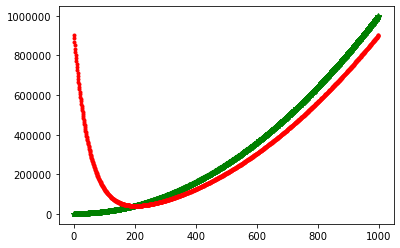

tensor(9.0154e+09, grad_fn=<MseLossBackward>)


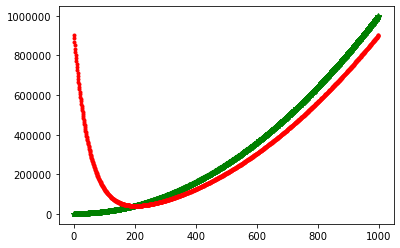

tensor(9.0154e+09, grad_fn=<MseLossBackward>)


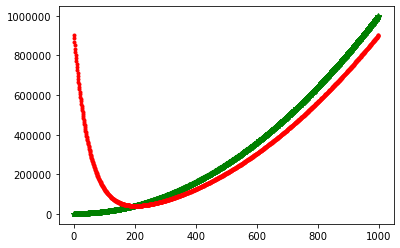

tensor(9.0154e+09, grad_fn=<MseLossBackward>)


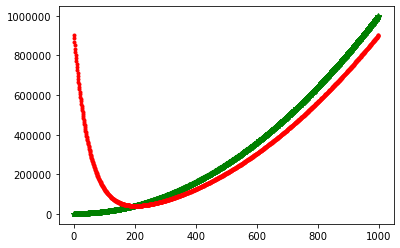

tensor(9.0154e+09, grad_fn=<MseLossBackward>)


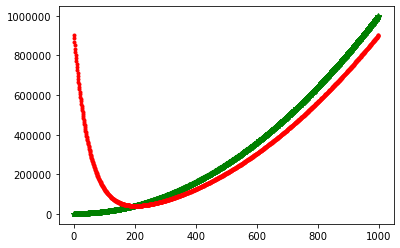

tensor(9.0154e+09, grad_fn=<MseLossBackward>)


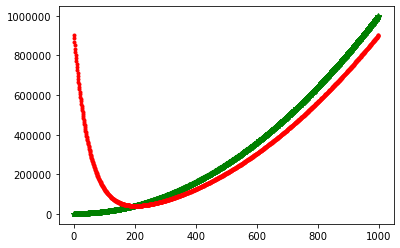

tensor(9.0154e+09, grad_fn=<MseLossBackward>)


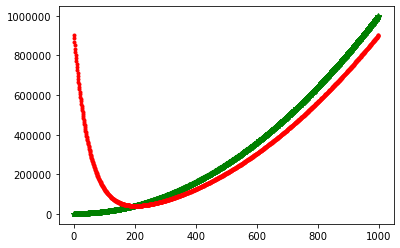

tensor(9.0154e+09, grad_fn=<MseLossBackward>)


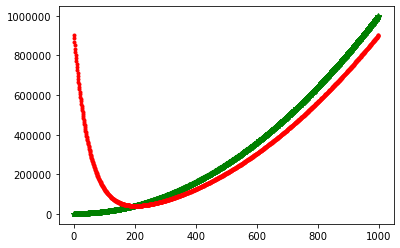

tensor(9.0154e+09, grad_fn=<MseLossBackward>)


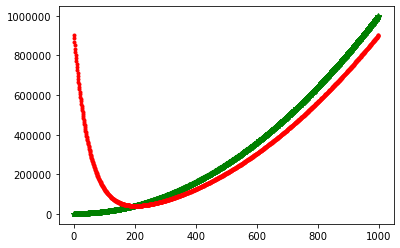

tensor(9.0154e+09, grad_fn=<MseLossBackward>)


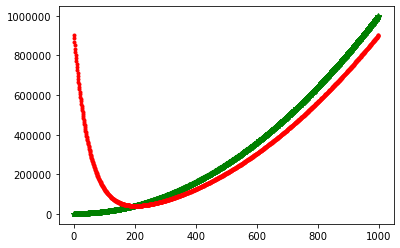

tensor(9.0154e+09, grad_fn=<MseLossBackward>)


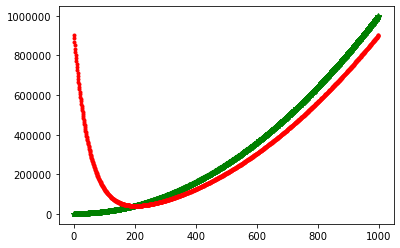

tensor(9.0154e+09, grad_fn=<MseLossBackward>)


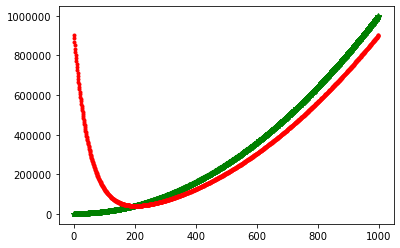

tensor(9.0154e+09, grad_fn=<MseLossBackward>)


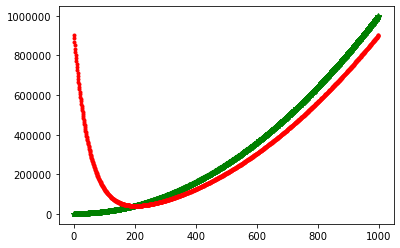

tensor(9.0154e+09, grad_fn=<MseLossBackward>)


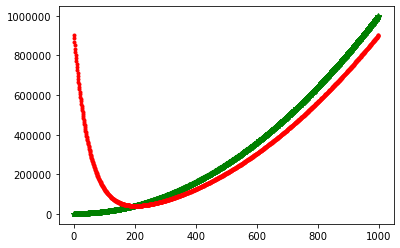

tensor(9.0154e+09, grad_fn=<MseLossBackward>)


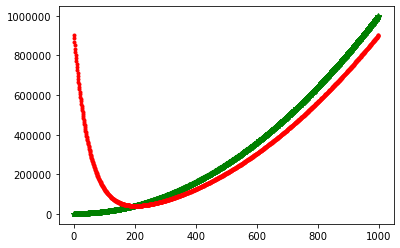

tensor(9.0154e+09, grad_fn=<MseLossBackward>)


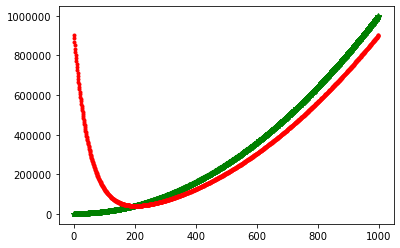

tensor(9.0154e+09, grad_fn=<MseLossBackward>)


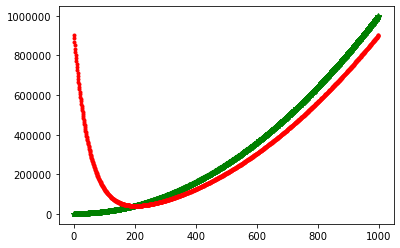

tensor(9.0154e+09, grad_fn=<MseLossBackward>)


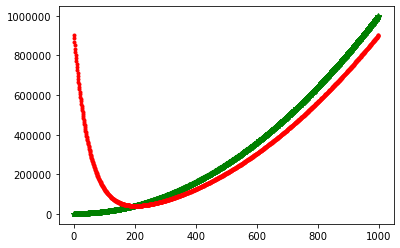

tensor(9.0154e+09, grad_fn=<MseLossBackward>)


In [132]:
for i in range(50):
    pltpred = []
    for seq,y_train in train_data:
#         print(seq,y_train)
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1, model.hidden_size), torch.zeros(1,1, model.hidden_size))
        y_pred = model(seq)
#         print(seq,y_train,y_pred)
        pltpred.append(y_pred)
        
        

        loss = criterion(y_pred, y_train)
#         print(loss)
#         print('.......................')
        loss.backward()
        optimizer.step()

#     plt.plot(x,'.')
#     plt.show()
    plt.plot(x,y,'g*')
#     print(pltpred)
    plt.plot(x,pltpred,'r.')

    plt.show()
    print(loss)



In [88]:
# 生成预测值
future = 50
preds = train_norm[-50:].tolist()

print(preds)
model.eval()

for i in range(future):
    seq = torch.FloatTensor(preds[-window_size:]).to(device)
    with torch.no_grad():
        model.hidden = (torch.zeros(1,1,model.hidden_size),torch.zeros(1,1,model.hidden_size))
        preds.append(model(seq).item())

# print(preds)

NameError: name 'train_norm' is not defined

In [126]:
model.eval()
with torch.no_grad():
    model.hidden = (torch.zeros(1,1,model.hidden_size),torch.zeros(1,1,model.hidden_size))
    print(model(torch.Tensor([10])).item())
    


7.168982028961182
